In [1]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
iris

In [3]:
import pandas as pd
df_iris = pd.DataFrame(iris.data)
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
import sqlite3
connect = sqlite3.connect('./db.sqlite3')
df_iris.to_sql('iris_resource', connect, if_exists='append', index=False)

In [5]:
df_load = pd.read_sql_query('select * from iris_resource', connect)
df_load.head(4)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [6]:
x_data = df_load.to_numpy()
x_data.shape

(150, 4)

In [7]:
import numpy as np

In [8]:
y_data = iris.target
y_data, np.unique(y_data)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 1, 2]))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data)

In [19]:
import tensorflow as tf

In [21]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(4,))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(24, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(3, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'], ) # gadget

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 75        
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.fit(x_data, y_data, epochs=50, validation_split=0.3) # 학습
model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

# Evaluation

In [24]:
model.evaluate(x_data, y_data)

5/5 [==============================] - 0s 2ms/step - loss: 0.2430 - acc: 0.9733


[0.24295122921466827, 0.9733333587646484]

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
y_pred = model.predict(x_data)
y_pred.shape, y_pred[4]

((150, 3), array([9.8657191e-01, 1.2616184e-02, 8.1187981e-04], dtype=float32))

In [27]:
import numpy as np
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax.shape, y_pred_argmax[4]

((150,), 0)

In [28]:
y_data.shape, y_data[4]

((150,), 0)

In [29]:
confusion_matrix(y_data, y_pred_argmax)

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  0, 50]])

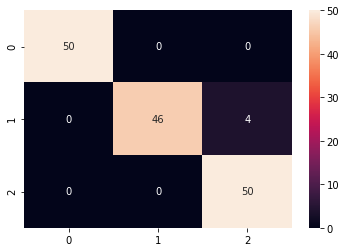

In [30]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_data, y_pred_argmax), annot=True)

# service

In [31]:
x_data[25], y_data[25]

(array([5. , 3. , 1.6, 0.2]), 0)

In [32]:
pred = model.predict([[5. , 3. , 1.6, 0.2]])
pred

array([[0.95752525, 0.0398084 , 0.00266638]], dtype=float32)

In [33]:
import numpy as np
np.argmax(pred)

0

In [34]:
y_pred = model.predict(x_data)
y_pred.shape

(150, 3)